# TFM MIRIAM LOPEZ

## Sprint 1: Analisis Exploratorio y Tratamiento de datos:
- Carga de Datos
- Limpieza y procesamiento
- Analisis Básico
- Visualizaciones con librerias Matplotlib y Seaborn
- Busqueda de patrones y correlaciones entre los parametros

In [2]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [3]:
#Mostrar los graficos
%matplotlib inline

In [4]:
print("Directorio de trabajo actual:", os.getcwd())

Directorio de trabajo actual: C:\Users\hp\OneDrive\Escritorio\MASTER PYTHON 1\Master Python\11_Hacking\TFM\Notebook


In [5]:
# Cargamos los datos
try:
    df = pd.read_csv('../DATA/Raw_Data/Data_Pool.csv')
    print('Archivo Cargado')
    print(df.head(2)) 
except Exception as e:
    print(f'Error en la lectura del archivo: {e}')

Archivo Cargado
      Device            Time, Hour   PH  ORP  Salinity  Temperature  \
0  Device 01  18/01/2024, 00:08:34  7.5  644      5181           25   
1  Device 01  18/01/2024, 00:10:35  6.3  742      5240           25   

   Flow status  
0            1  
1            1  


In [6]:
#Renombramos la columa 'Time, Hour' y  pasar a Datetime format
df = df.rename(columns={'Time, Hour': 'Time'})
df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y, %H:%M:%S')
df['Time'].head(2)

0   2024-01-18 00:08:34
1   2024-01-18 00:10:35
Name: Time, dtype: datetime64[ns]

In [7]:
#Info del DF
df.info

<bound method DataFrame.info of            Device                Time    PH  ORP  Salinity  Temperature  \
0       Device 01 2024-01-18 00:08:34  7.50  644      5181           25   
1       Device 01 2024-01-18 00:10:35  6.30  742      5240           25   
2       Device 01 2024-01-18 00:14:37  6.30  760      5233           25   
3       Device 01 2024-01-18 00:28:42  6.50  774      5240           24   
4       Device 01 2024-01-18 00:31:34  6.30  764      5253           24   
...           ...                 ...   ...  ...       ...          ...   
141097   Device10 2024-07-18 10:42:52  9.68  540      3777        -9999   
141098   Device10 2024-07-18 11:12:52  9.67  540      3782           13   
141099   Device10 2024-07-18 11:42:53  9.60  539      4073           14   
141100   Device10 2024-07-18 12:42:53  9.50  539      4053        -9999   
141101   Device10 2024-07-18 13:12:53  9.50  540      4022        -9999   

        Flow status  
0                 1  
1                 1  
2

In [8]:
df.describe()

,Time,PH,ORP,Salinity,Temperature,Flow status
count,141102,141102.000000,141102.000000,141102.000000,141102.000000,141102.000000
mean,2024-04-13 22:40:59.324396288,-165.849238,389.765524,4435.838925,-2362.903878,0.309450
min,2024-01-18 00:01:18,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000
25%,2024-02-26 04:05:04.750000128,7.100000,593.000000,3859.000000,7.000000,0.000000
50%,2024-04-16 07:07:38,7.400000,644.000000,4306.000000,18.000000,0.000000
75%,2024-05-27 13:28:05.500000,7.590000,680.000000,5183.000000,24.000000,1.000000
max,2024-07-18 13:12:53,10.000000,1129.000000,15427.000000,44.000000,1.000000
std,NaN,1304.943138,1607.346796,812.908034,4265.998757,0.462269


Observaciones:

- 141,102 registros en total de cada columna
- Existencia de valores atípicos extremos en ORP, Salinidad y Temperatura (-9999), que probablemente representan datos faltantes o errores.
- Flow status es una variable binaria (0 o 1) de cuando el clorificador esta en marcha o no. 
- La temperatura tiene una media negativa que nos sugiere problemas con los datos. 

In [9]:
#Nulos
nulls = df.isnull().sum()
nulls

Device         0
Time           0
PH             0
ORP            0
Salinity       0
Temperature    0
Flow status    0
dtype: int64

In [10]:
print(df.dtypes)

Device                 object
Time           datetime64[ns]
PH                    float64
ORP                     int64
Salinity                int64
Temperature             int64
Flow status             int64
dtype: object


In [11]:
# Acceder a la columna de PH
ph_column = df['PH']
print(ph_column.head())

0    7.5
1    6.3
2    6.3
3    6.5
4    6.3
Name: PH, dtype: float64


In [12]:
df.columns

Index(['Device', 'Time', 'PH', 'ORP', 'Salinity', 'Temperature',
       'Flow status'],
      dtype='object')

#### Outliers

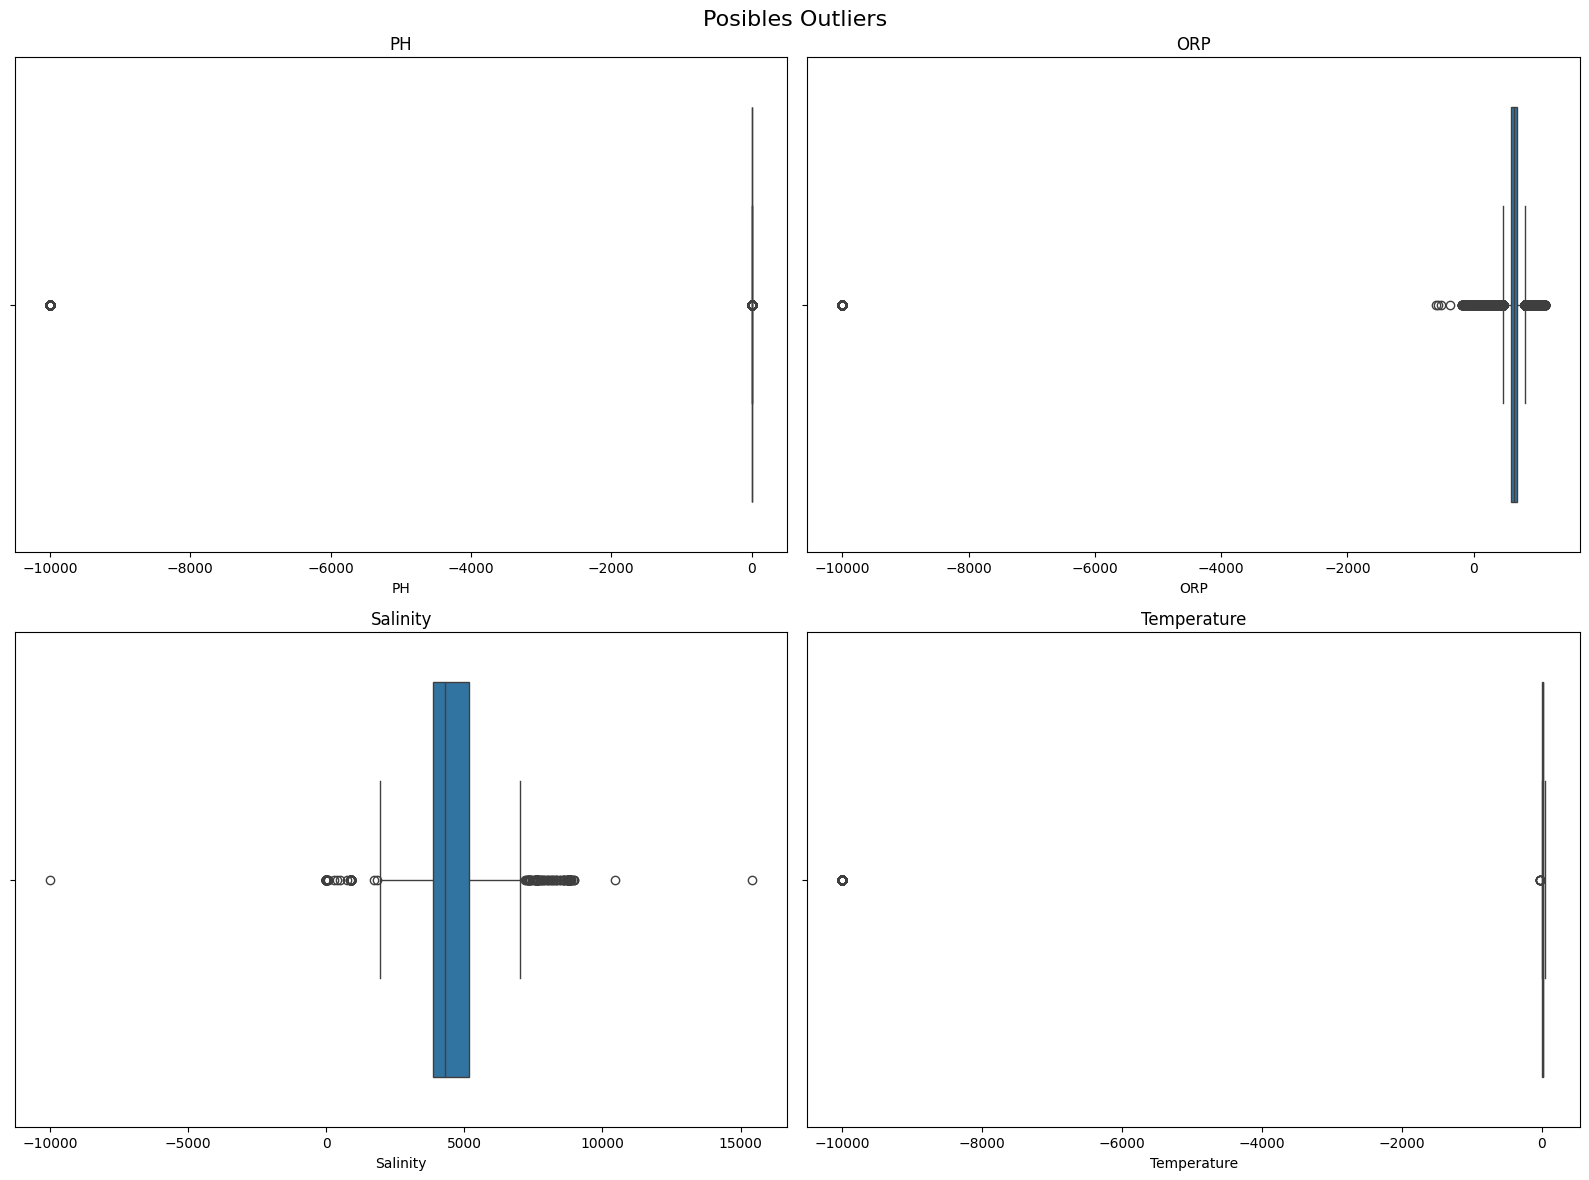

In [13]:
# Crear una figura con 4 subplots de Diagramas de Cajas para ver la distribucion de los datos
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Posibles Outliers', fontsize=16)

parametros = ['PH', 'ORP', 'Salinity', 'Temperature']

# Crear un plot para cada variable
for i, var in enumerate(parametros):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[var], ax=axs[row, col])
    axs[row, col].set_title(var)

# Ajustar el layout
plt.tight_layout()
plt.show()

Conclusiones Grafico Outliers:
- Como ya se podia saber con 'describe()' el dataset tiene outliers que indican la necesidad de limpiar los datos, investigar y eliminar.
- Hay valores que parecen ser erroneos como la temperatura, ORP y salinidad negativas
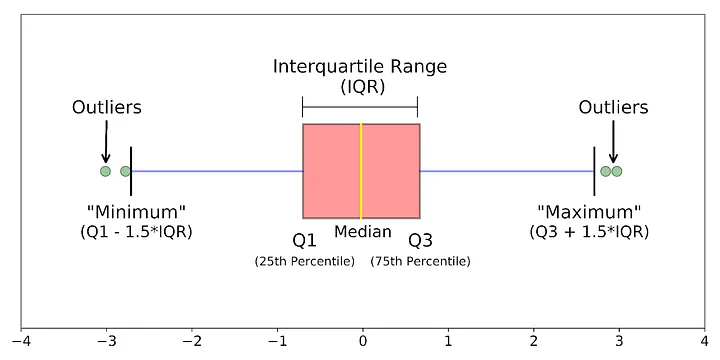

In [14]:
# Método IQR para eliminar outliers
def outliers(df, columns):
    for a in columns:
        Q1 = df[a].quantile(0.25)
        Q3 = df[a].quantile(0.75)
        IQR = Q3 - Q1
        min = Q1 - 1.5 * IQR
        max = Q3 + 1.5 * IQR  # Corregido: + en lugar de *
        df = df[(df[a] >= min) & (df[a] <= max)]  # Corregido: 'a' en lugar de 'col'
    return df

# Eliminando los extraños valores de -9999 que parecen provenir de error
param_columns = ['PH', 'ORP', 'Salinity', 'Temperature']
df = df[~(df[param_columns] == -9999).any(axis=1)]

# Aplicando la función de eliminación de outliers
df_clean = outliers(df, param_columns)

# Verificar la diferencia
print(f"Filas originales: {len(df)}")
print(f"Filas después de eliminar outliers: {len(df_clean)}")

print(df_clean[param_columns].describe())


Filas originales: 103511
Filas después de eliminar outliers: 84183
                 PH           ORP      Salinity   Temperature
count  84183.000000  84183.000000  84183.000000  84183.000000
mean       7.370986    636.869677   4348.924094     20.680506
std        0.315001     66.164564    878.779124      6.361192
min        6.350000    459.000000   1739.000000      4.000000
25%        7.200000    595.000000   3715.000000     17.000000
50%        7.400000    648.000000   4134.000000     21.000000
75%        7.500000    678.000000   5203.000000     26.000000
max        8.350000    811.000000   6855.000000     39.000000


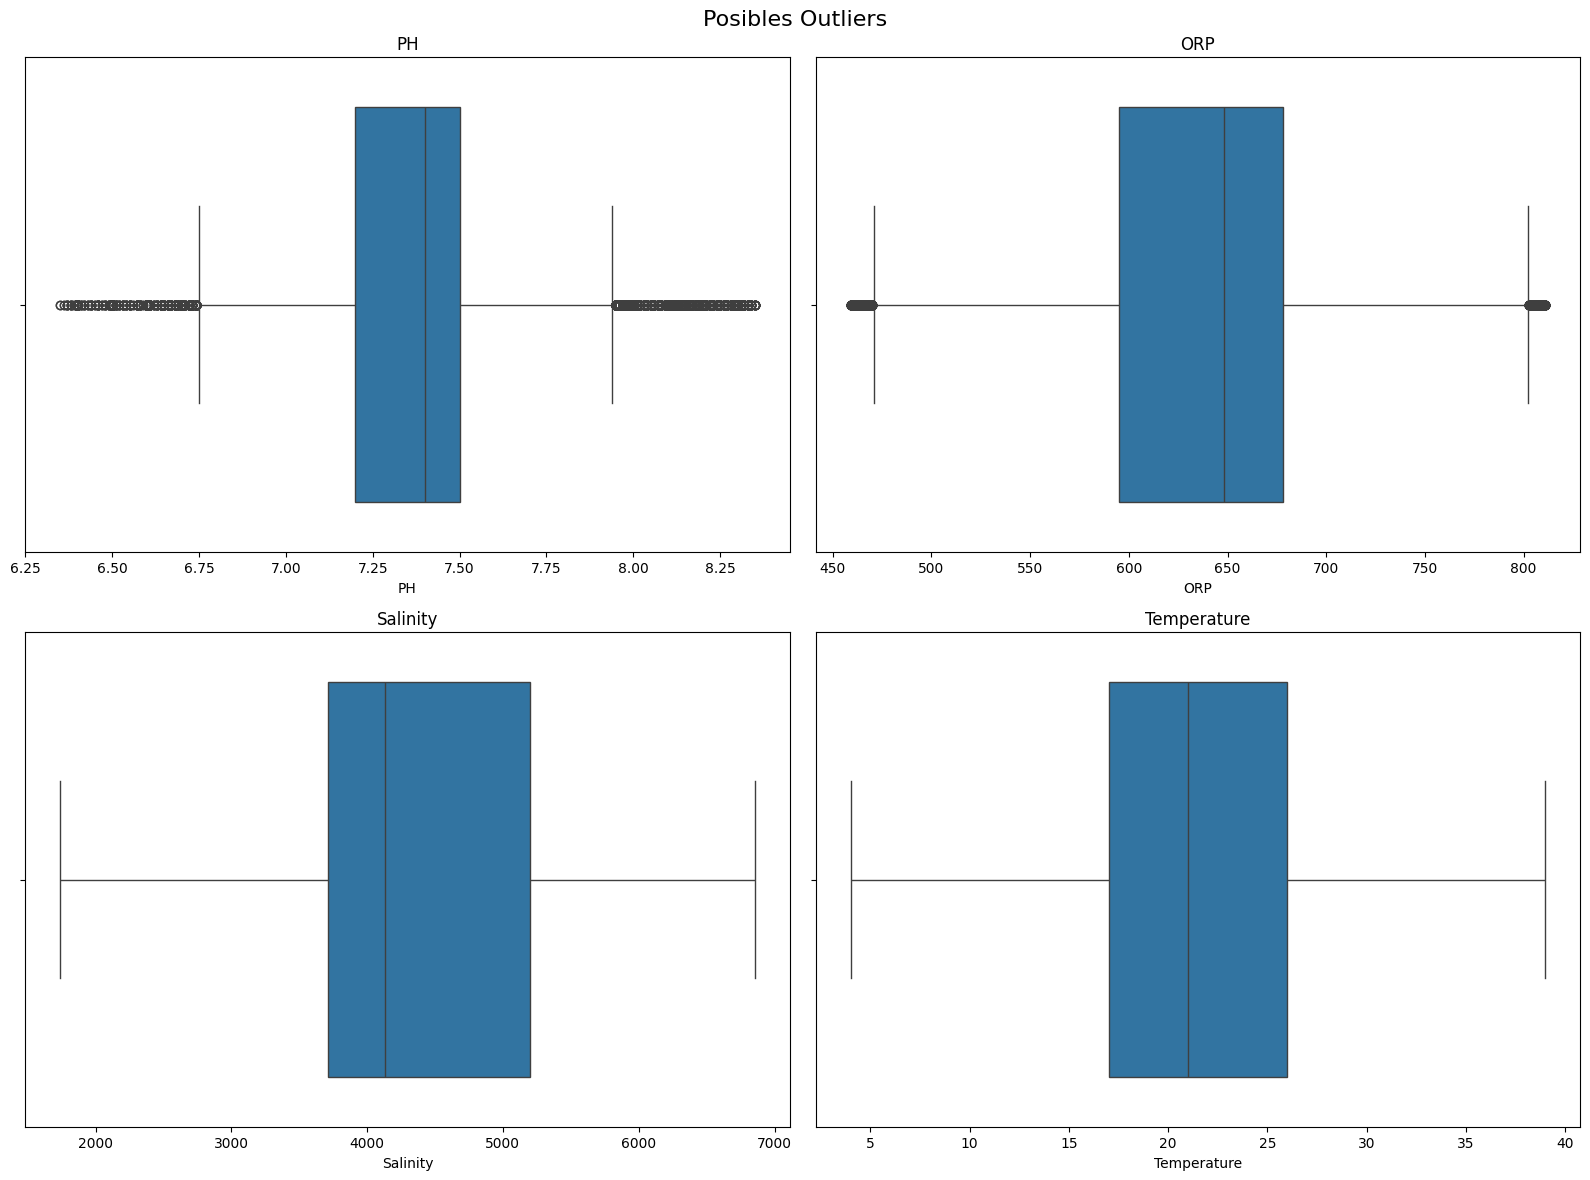

In [15]:
# Crear una figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Posibles Outliers', fontsize=16)

parametros = ['PH', 'ORP', 'Salinity', 'Temperature']

# Crear un plot para cada variable
for i, var in enumerate(parametros):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_clean[var], ax=axs[row, col])
    axs[row, col].set_title(var)

# Ajustar
plt.tight_layout()
plt.show()

A pesar de seguir viendo outliers hay que pensar que hay 10 devices diferentes leyendo datos de piscinas con diferentes condiciones. Habria que analizar exaustivamente más cada una de ellas. Es posible que hubiera que hacer una limpieza de ellas por separado, o basarse en que datos serían normales para una piscina. 

C:\Users\hp\AppData\Local\Temp\ipykernel_15656\3484367115.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\hp\AppData\Local\Temp\ipykernel_15656\3484367115.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\hp\AppData\Local\Temp\ipykernel_15656\3484367115.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\hp\AppData\Local\Temp\ipykernel_15656\3484367115.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


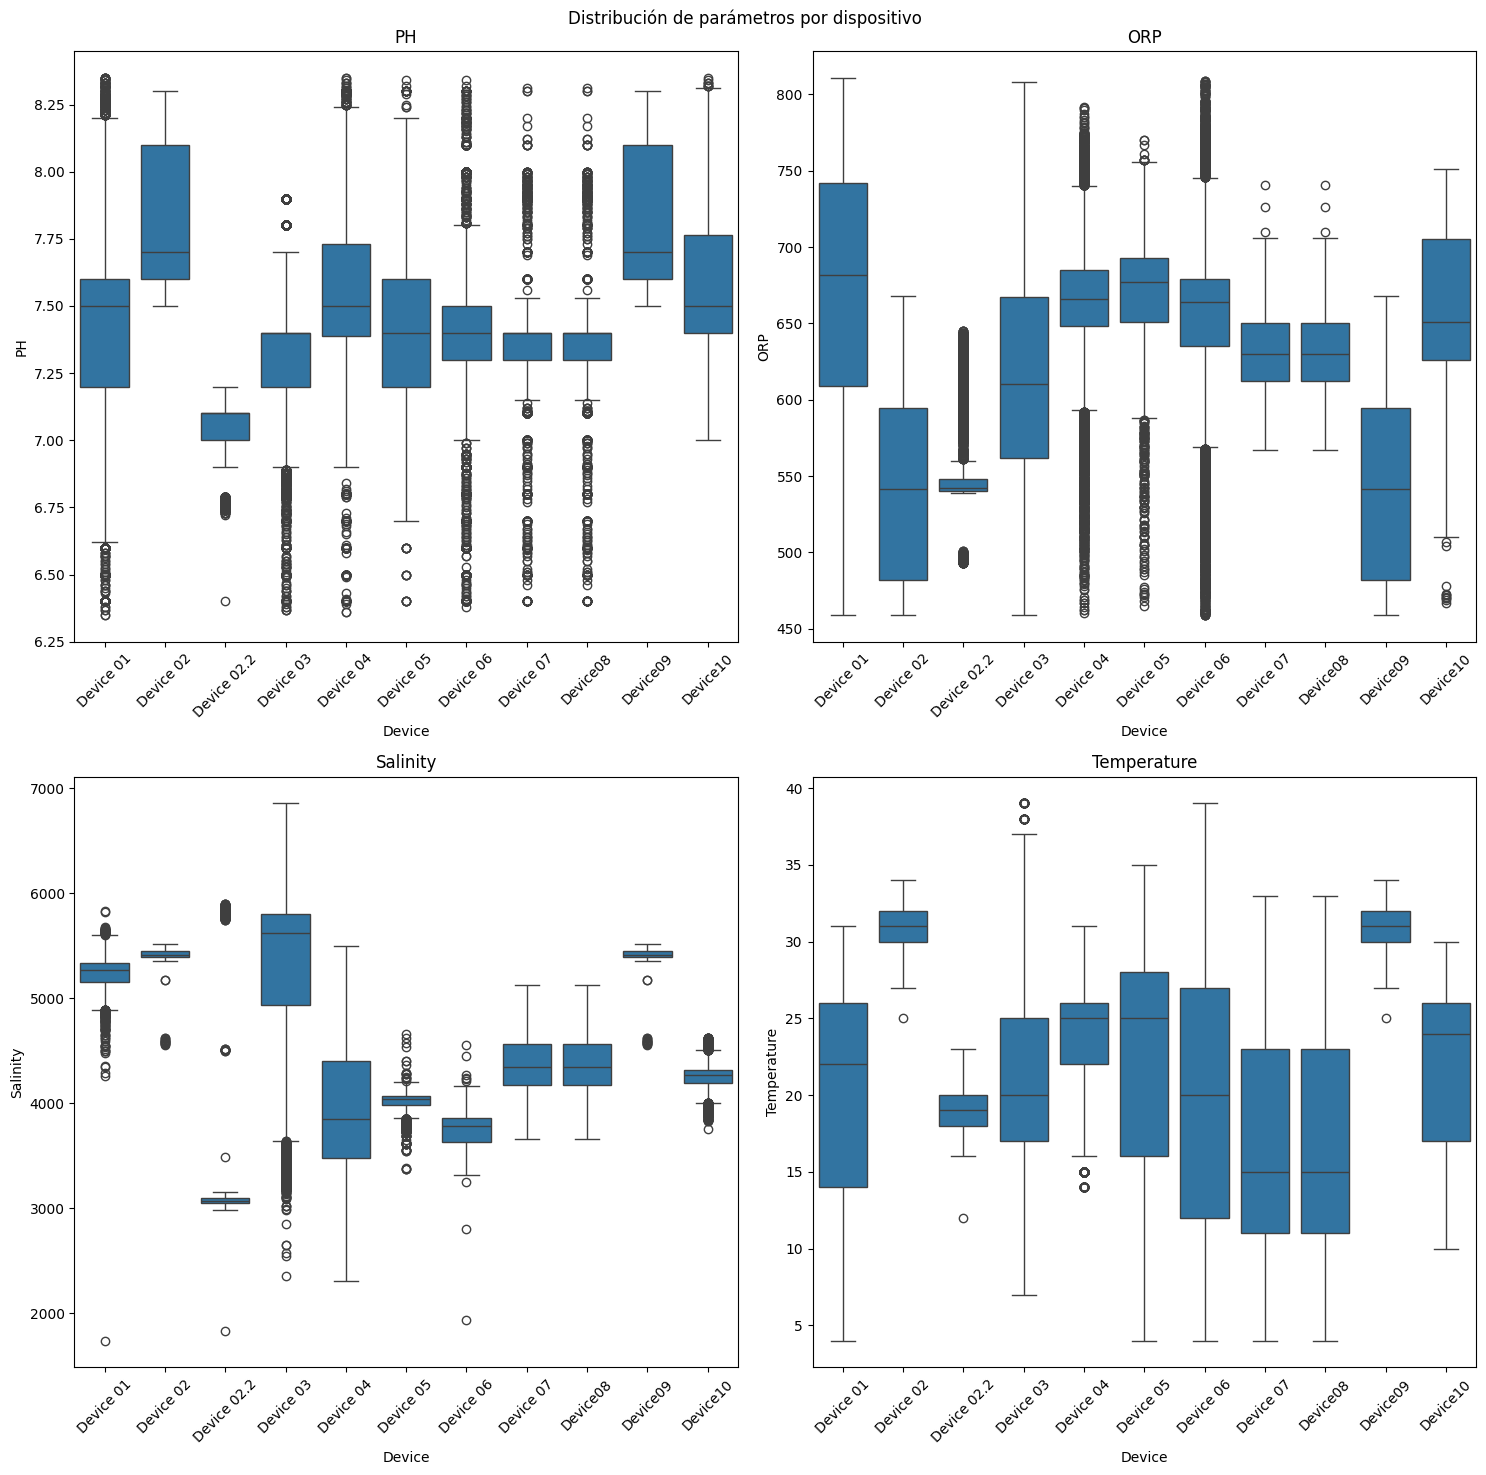

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Distribución de parámetros por dispositivo')

params = ['PH', 'ORP', 'Salinity', 'Temperature']

for i, param in enumerate(params):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x='Device', y=param, data=df_clean, ax=ax)
    ax.set_title(param)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

#### Matriz de correlacion

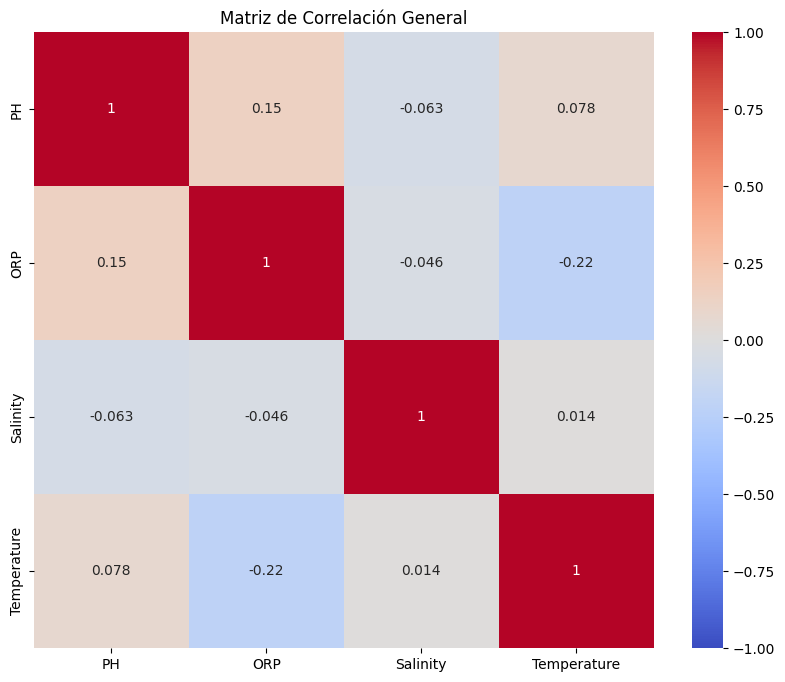

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
# Matriz de correlación general
corr_general = df_clean[params].corr()

# Visualización de la matriz de correlación general
plt.figure(figsize=(10, 8))
sns.heatmap(corr_general, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación General')
plt.show()

plt.tight_layout()
plt.show()

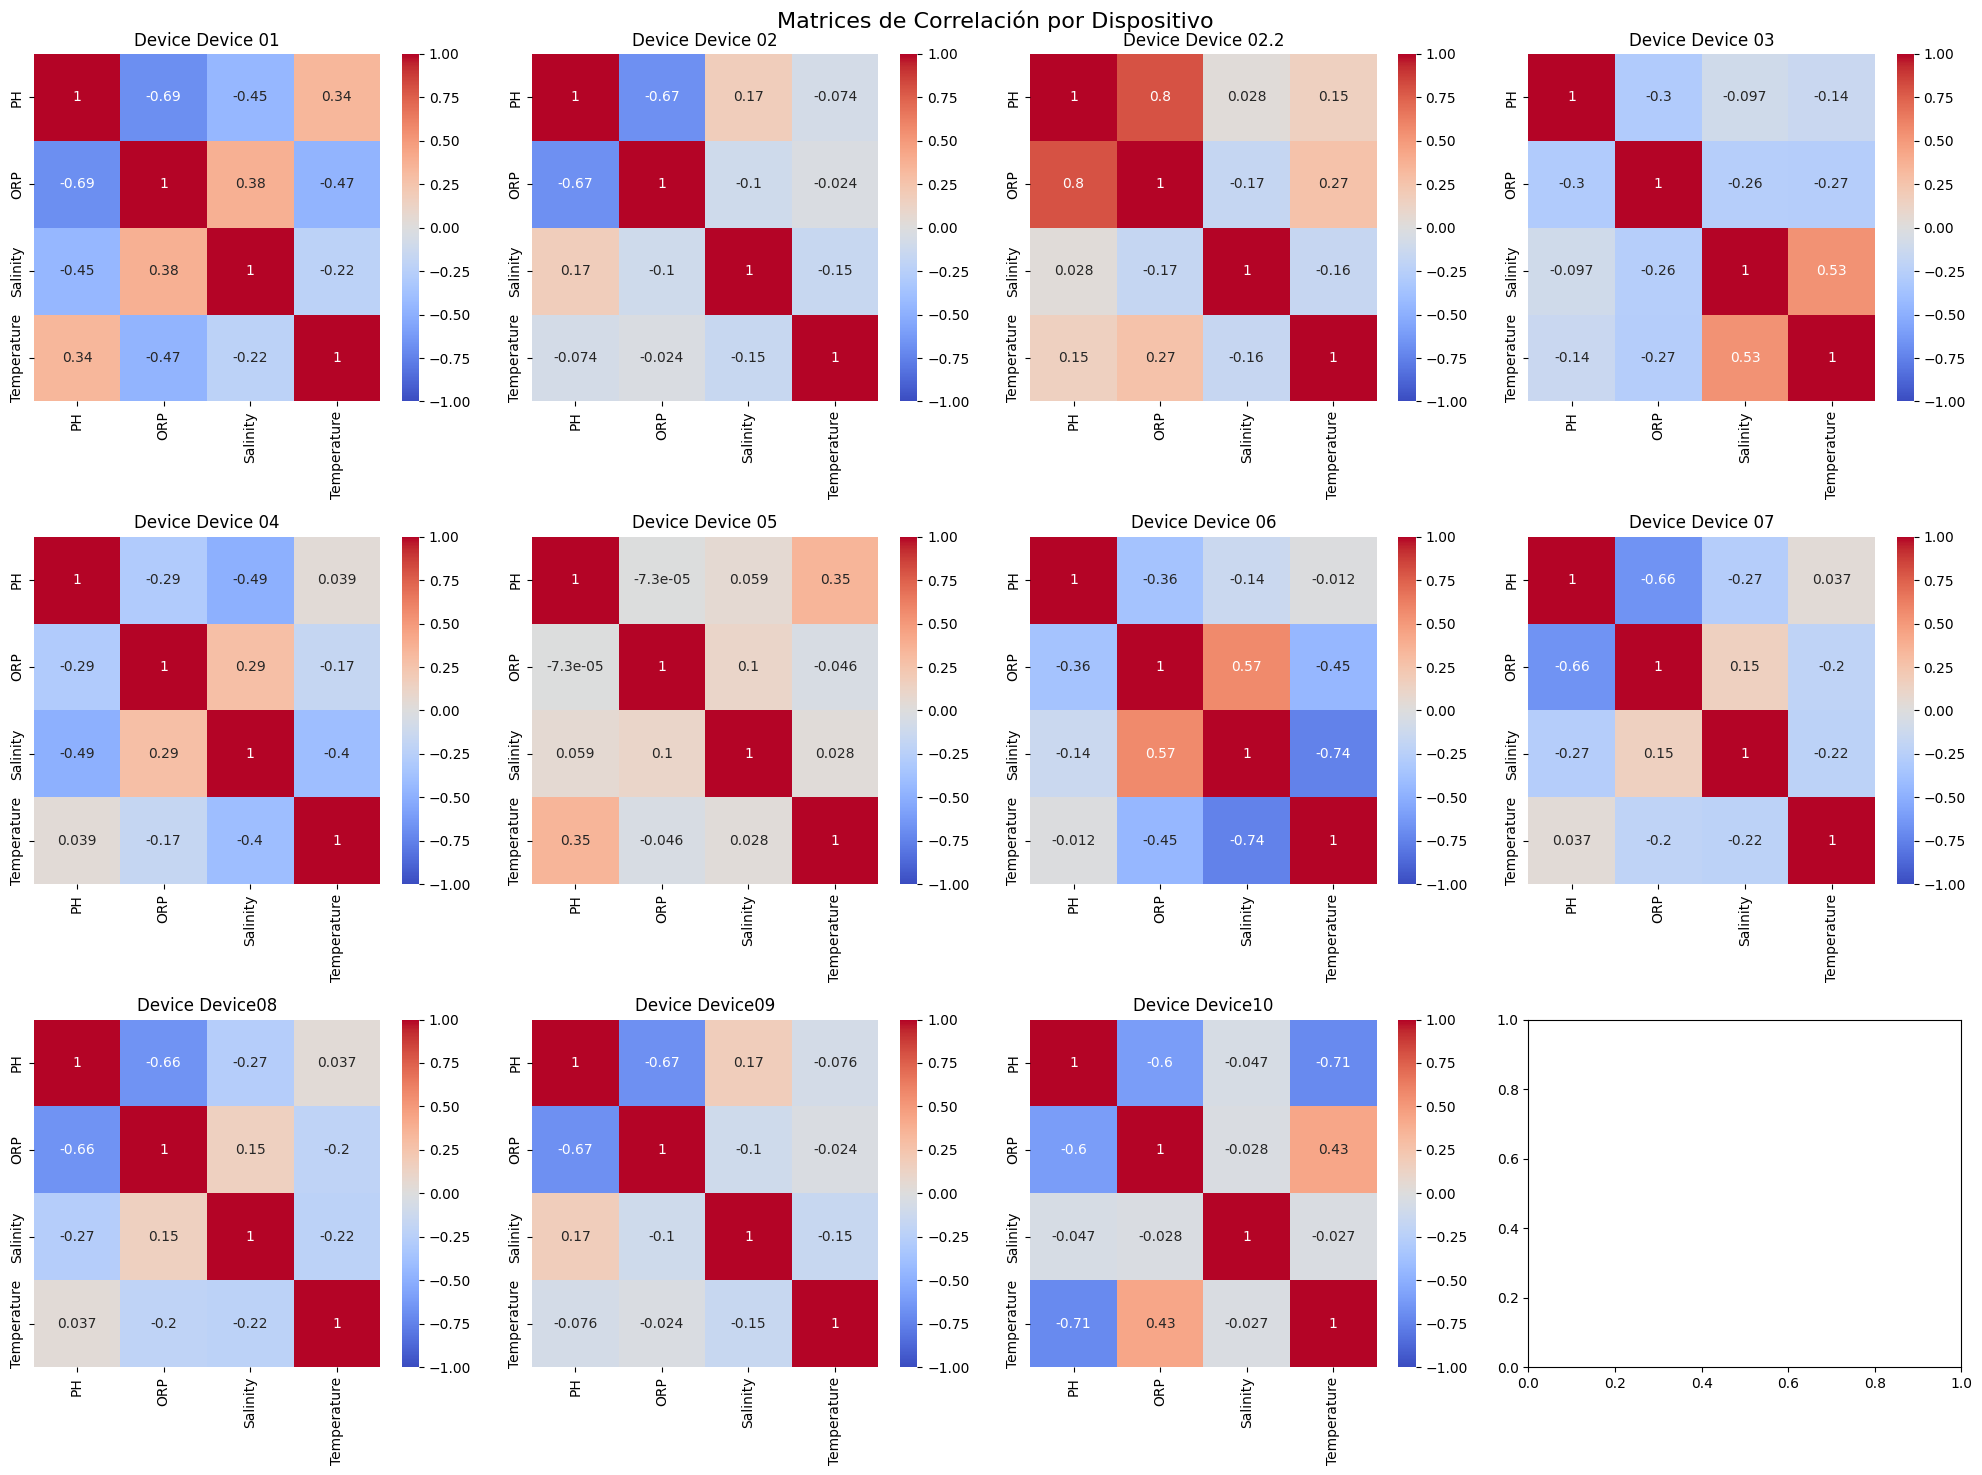

In [18]:
# Matrices de correlación por dispositivo
devices = df['Device'].unique()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Matrices de Correlación por Dispositivo', fontsize=16)

for i, device in enumerate(devices):
    device_data = df[df['Device'] == device][params]
    corr_device = device_data.corr()
    
    ax = axes[i // 4, i % 4]
    sns.heatmap(corr_device, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax)
    ax.set_title(f'Device {device}')

plt.tight_layout()
plt.show()

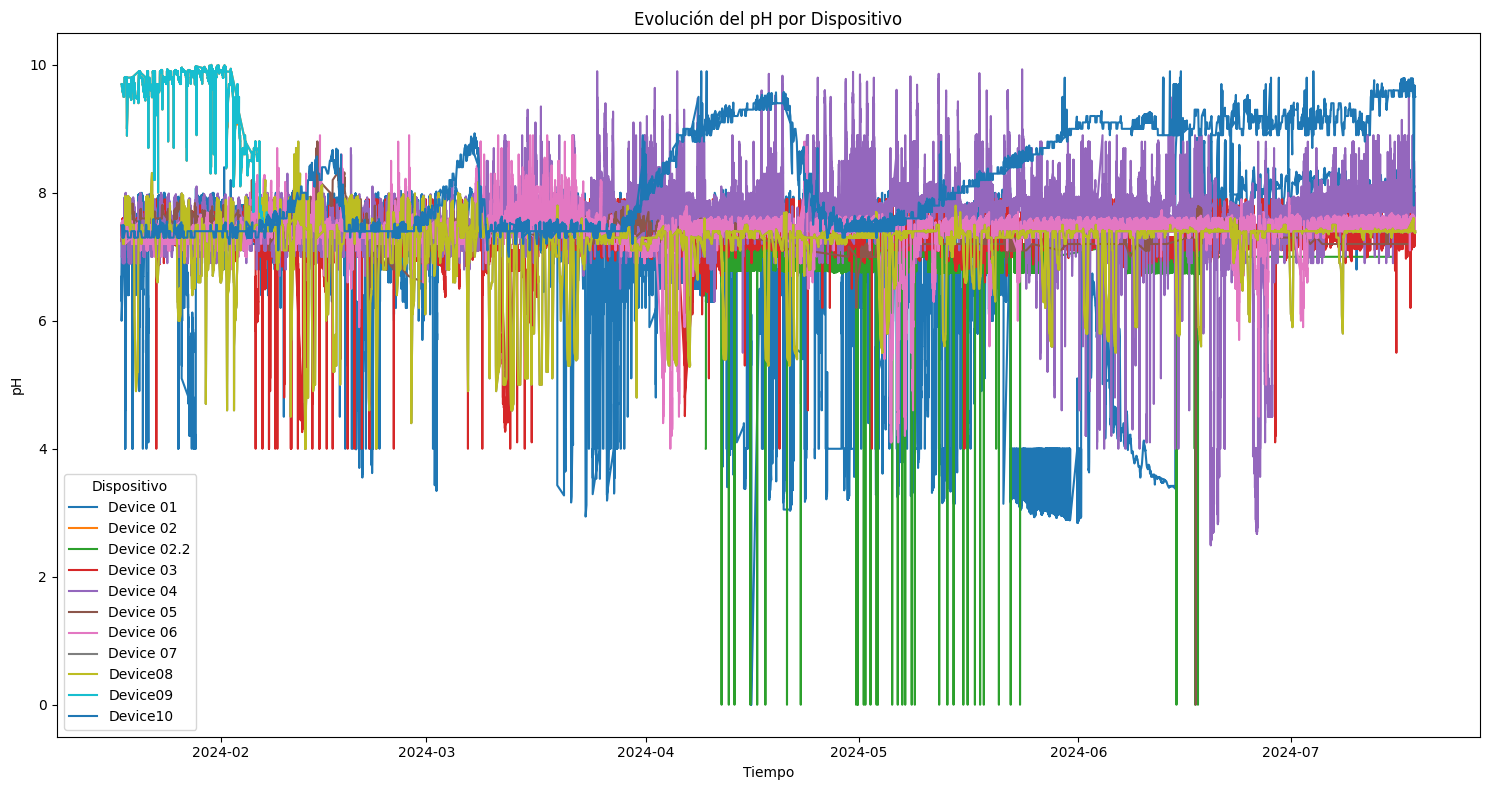

In [22]:
#Representacion del PH en funcion del tiempo por device
fig, ax = plt.subplots(figsize=(15, 8))
devices = df['Device'].unique()

for device in devices:
    device_data = df[df['Device'] == device]
    ax.plot(device_data['Time'], device_data['PH'], label=device)

ax.set_xlabel('Tiempo')
ax.set_ylabel('pH')
ax.set_title('Evolución del pH por Dispositivo')
ax.legend(title='Dispositivo')


plt.tight_layout()
plt.show()

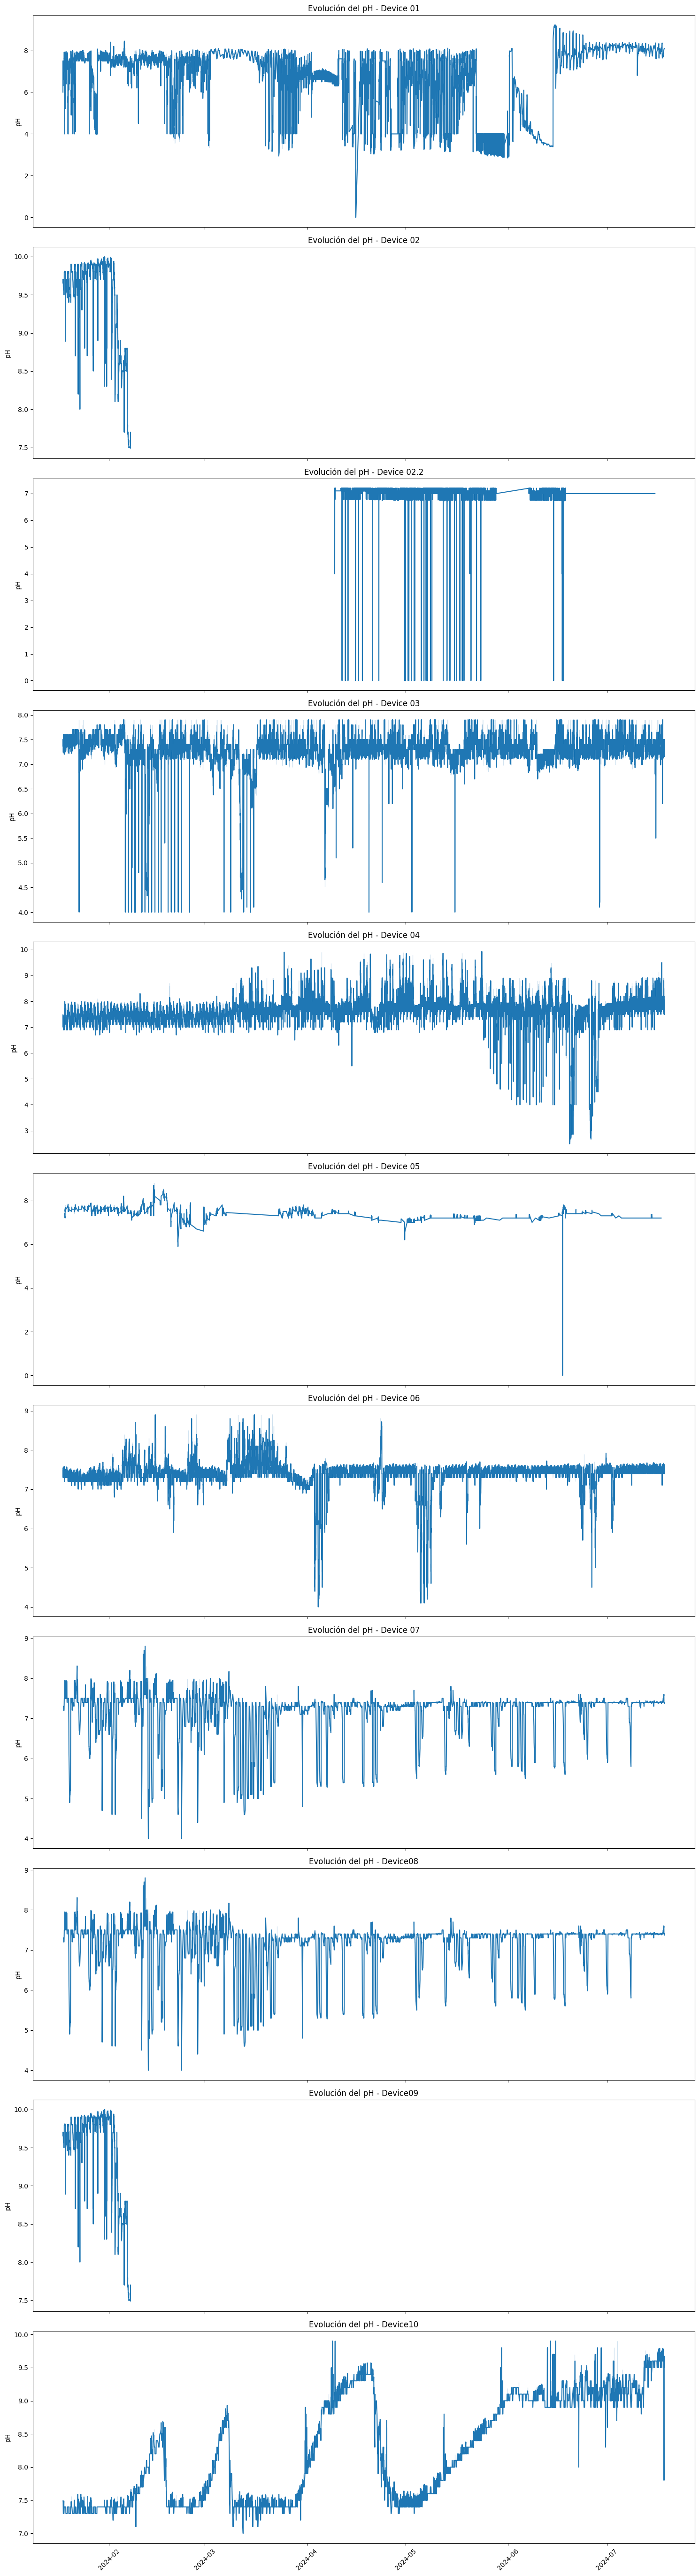

In [24]:
fig, axes = plt.subplots(nrows=len(devices), ncols=1, figsize=(15, 5*len(devices)), sharex=True)

# Asegurarse de que axes sea siempre una lista, incluso si solo hay un dispositivo
if len(devices) == 1:
    axes = [axes]

# Crear un gráfico para cada dispositivo
for ax, device in zip(axes, devices):
    device_data = df[df['Device'] == device]
    
    # Crear el gráfico de líneas
    sns.lineplot(x='Time', y='PH', data=device_data, ax=ax)
    
    # Configurar el gráfico
    ax.set_title(f'Evolución del pH - {device}')
    ax.set_xlabel('')  # Eliminar etiqueta x excepto en el último gráfico
    ax.set_ylabel('pH')

    # Rotar las etiquetas del eje x
    ax.tick_params(axis='x', rotation=45)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Observaciones 

Viendo estos resultados, los outliers individuales, vemos que los datos se tendrian que tratar de manera individual dado que las piscinas no son siempre iguales, los factores externos a los que estan expuestos son diferentes y por tanto no deberian de tratarse de la miasma manera. 

Dividiremos el dataset por dispositivos, enfocarse solo en uno tiene estas ventajas:

- Manejo de datos, trabajaremos con un subconjunto más pequeño esto hace que el proceso sea más rápido y menos propenso a errores.
- Análisis más detallado: dara la oportunidad de profundizar en las características específicas de cada dispositivo sin que los datos de otros dispositivos interfieran.
- Personalización: adaptacion tus análisis y modelos a las particularidades de cada dispositivo.
- Escalabilidad: Una vez que hayas desarrollada la metodología para un dispositivo se puede aplicar a los demás.
- Comparación entre dispositivos: compararemos los resultados entre dispositivos y se buscará analizar que características afectan a todos y cuales son particulares y dependen de las condiciones individuales del dispositivo. 
